##2. Erstelle für diesen neuen Datensatz eine vollständige deskriptive Statistik und zeige dabei: Welche Variablen sind noch enthalten, wie sind diese ausgeprägt (Häufigkeiten / Lage- und Streuungsmaße / Boxplots & Histogramme)

In [2]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import plotly.express as px
import missingno as msno

In [3]:
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx" )
uni_df

,Participant,Studiengang,Standort,Besuch Wirtschaftsmathematik,Geschlecht,Geburtsjahr,Beziehungsstatus,Durchschnittsnote im Abitur,Mathematiknote im Abitur,LK_Deutsch,...,Zeit-Sonstiges,Wechsel Praxispartner,Lebenszufriedenheit,Zufriedenheit mit Praxispartner,Zufriedenheit mit finanzieller Situation,Zufriedenheit mit Gesundheit,Zufriedenheit mit Kommilitonenaustausch,Studienzufriedenheit,Mathenote im 2. Semester,Zufriedenheit mit Note
0,53,4,21,5.0,1,24.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,4,21,6.0,2,19.0,3.0,3.0,3.0,0.0,...,1.0,2.0,5.0,3.0,2.0,5.0,7.0,7.0,1.3,2.0
2,56,4,21,6.0,2,22.0,1.0,3.3,2.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,16,21,8.0,2,21.0,2.0,2.3,3.0,1.0,...,NaN,2.0,6.0,3.0,2.0,6.0,5.0,6.0,NaN,NaN
4,58,16,21,5.0,1,19.0,1.0,NaN,NaN,NaN,...,NaN,3.0,10.0,10.0,6.0,10.0,5.0,10.0,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1022,24,18,NaN,2,23.0,NaN,2.0,2.0,0.0,...,36.0,3.0,4.0,6.0,10.0,3.0,1.0,6.0,2.0,3.0
882,1023,24,18,NaN,2,23.0,2.0,3.3,4.0,0.0,...,NaN,3.0,9.0,8.0,5.0,10.0,6.0,7.0,4.0,2.0
883,1024,4,18,NaN,1,20.0,NaN,NaN,3.0,0.0,...,31.0,3.0,7.0,7.0,3.0,6.0,8.0,6.0,3.7,3.0
884,1025,5,18,6.0,1,22.0,1.0,2.0,2.0,0.0,...,NaN,3.0,8.0,8.0,7.0,9.0,9.0,9.0,3.0,2.0


In [7]:

total_particitpants=len(uni_df['Participant'])

geschlecht_count=uni_df['Geschlecht'].value_counts()
count_male=geschlecht_count.get(1,0)


print("total_particitpants", total_particitpants)
print(geschlecht_count)
print("Number of Male",count_male)
print("Number of Male",count)

total_particitpants 886
Geschlecht
2    625
1    258
3      3
Name: count, dtype: int64


In [8]:
import pandas as pd
from scipy import stats


columns_list = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Lebenszufriedenheit', 'Zufriedenheit mit Praxispartner', 'Zufriedenheit mit finanzieller Situation', 'Zufriedenheit mit Gesundheit', 'Zufriedenheit mit Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote im 2. Semester', 'Zufriedenheit mit Note']


column_string = ' + '.join(columns_list)

print(column_string)


Participant + Studiengang + Standort + Besuch Wirtschaftsmathematik + Geschlecht + Geburtsjahr + Beziehungsstatus + Durchschnittsnote im Abitur + Mathematiknote im Abitur + LK_Deutsch + LK_Mathe + LK_Englisch + Religion + Lernaufwand + Schwierigkeitsgrad + Umfang + Erwartungen + Zeit-Studium + Zeit-Praxispartner + Zeit-Nebenjob + Zeit-Hobbys + Zeit-Freizeit + Zeit-Hausarbeit + Zeit-Essen + Zeit-Schlafen + Zeit-Sonstiges + Wechsel Praxispartner + Lebenszufriedenheit + Zufriedenheit mit Praxispartner + Zufriedenheit mit finanzieller Situation + Zufriedenheit mit Gesundheit + Zufriedenheit mit Kommilitonenaustausch + Studienzufriedenheit + Mathenote im 2. Semester + Zufriedenheit mit Note


In [5]:
uni_df.isna().sum()


Participant                                   0
Studiengang                                   0
Standort                                      0
Besuch Wirtschaftsmathematik                 76
Geschlecht                                    0
Geburtsjahr                                  25
Beziehungsstatus                             92
Durchschnittsnote im Abitur                 119
Mathematiknote im Abitur                    126
LK_Deutsch                                   50
LK_Mathe                                     50
LK_Englisch                                  50
Religion                                      6
Lernaufwand                                 510
Schwierigkeitsgrad                          405
Umfang                                      405
Erwartungen                                 405
Zeit-Studium                                548
Zeit-Praxispartner                          548
Zeit-Nebenjob                               548
Zeit-Hobbys                             

<Axes: >

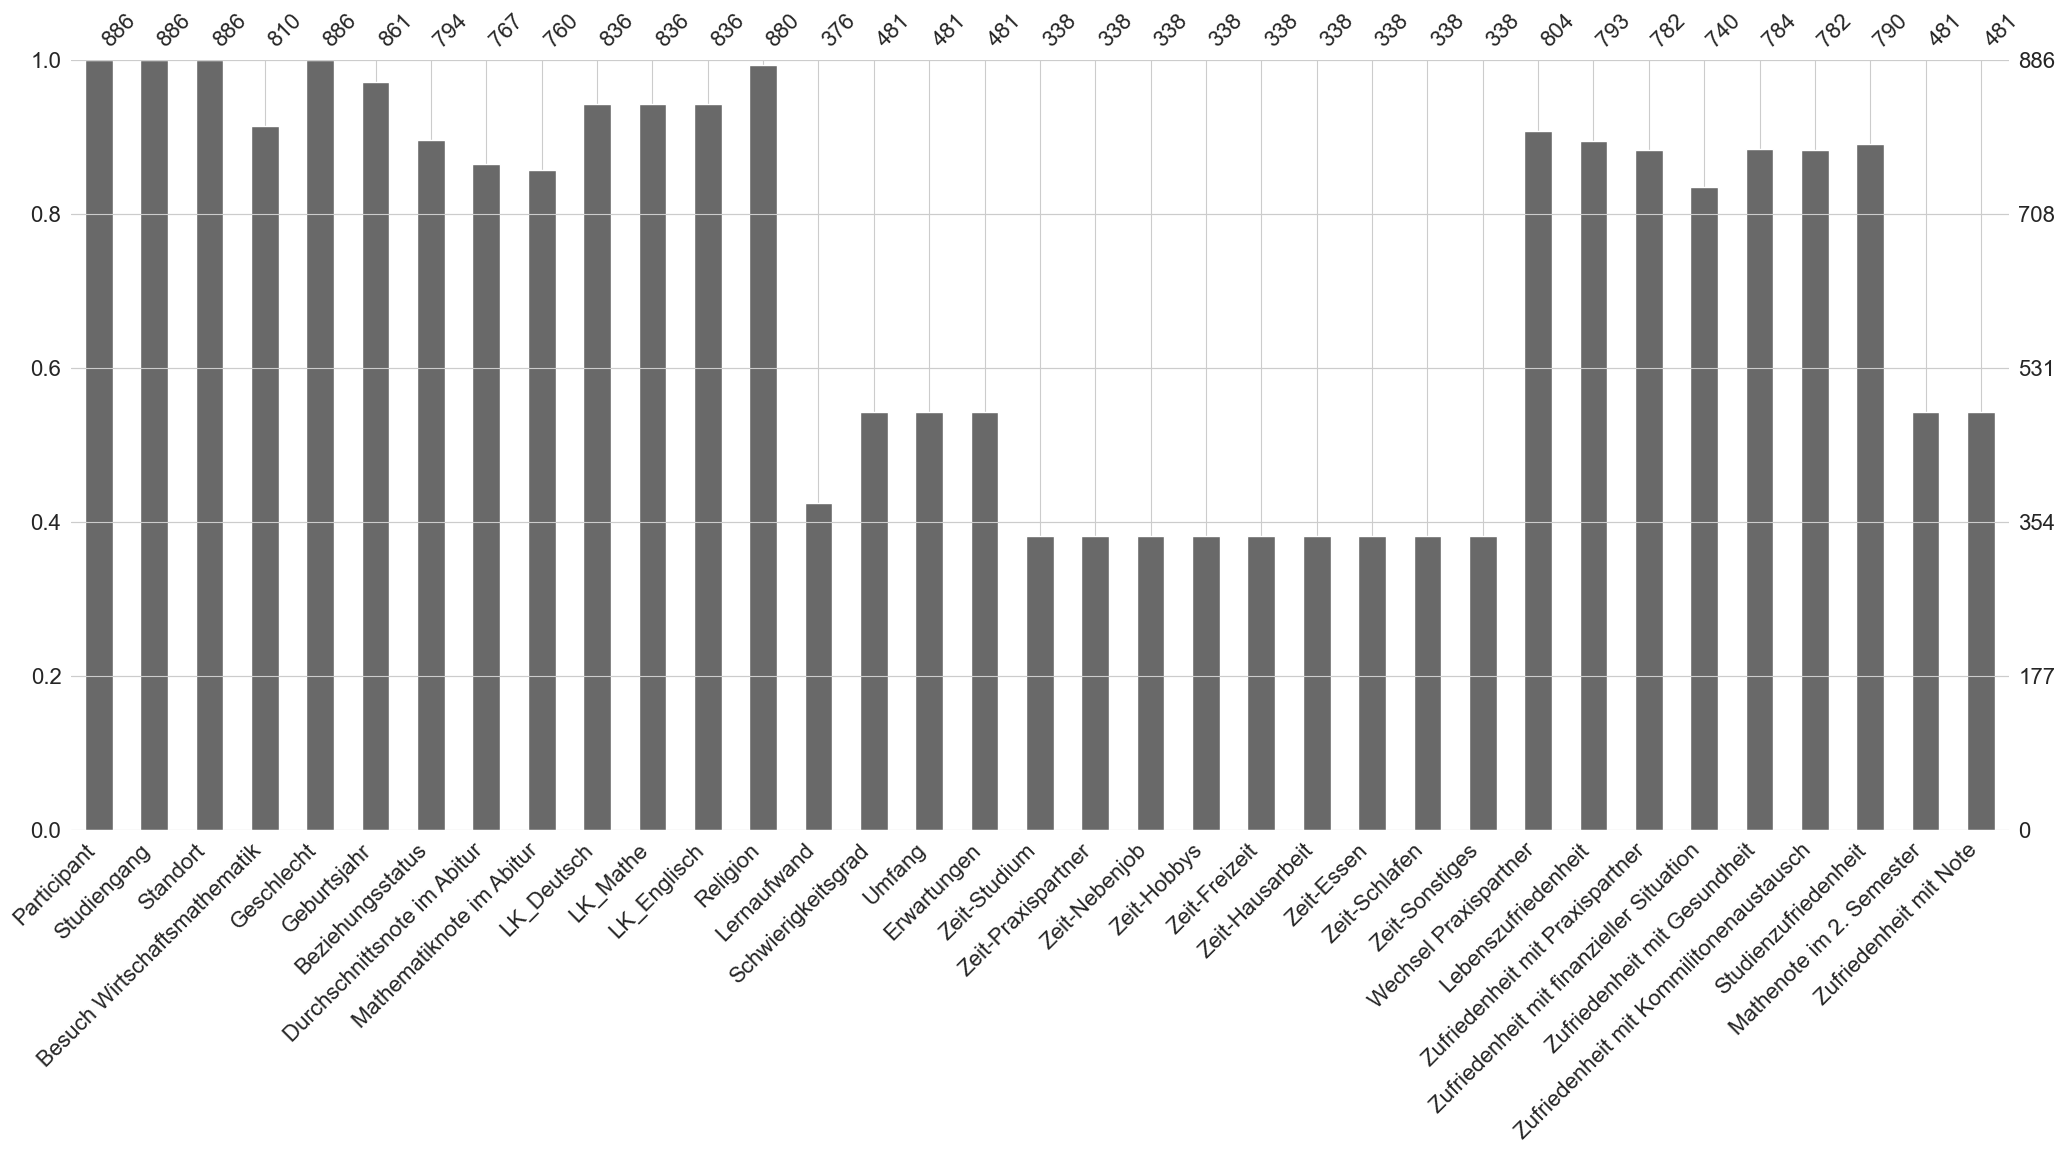

In [13]:
# Graphische Darstellung der fehlenden Werte
msno.bar(uni_df)


                  Variable  durchgeführter Test  Ergebnis des Tests
0     Studienzufriedenheit  Pearson-Korrelation        4.522135e-19
1  Mathenote_im_2_Semester  Pearson-Korrelation        9.374867e-03
2   Zufriedenheit_mit_Note  Pearson-Korrelation        7.884109e-01

Descriptive Statistics:
       Studienzufriedenheit  Mathenote_im_2_Semester  Zufriedenheit_mit_Note
count            458.000000               458.000000              458.000000
mean               5.954148                 3.057642                2.615721
std                2.158915                 1.289682                0.883061
min                0.000000                 1.000000                1.000000
25%                5.000000                 2.000000                2.000000
50%                6.000000                 3.000000                3.000000
75%                7.000000                 4.000000                3.000000
max               10.000000                 5.000000                5.000000


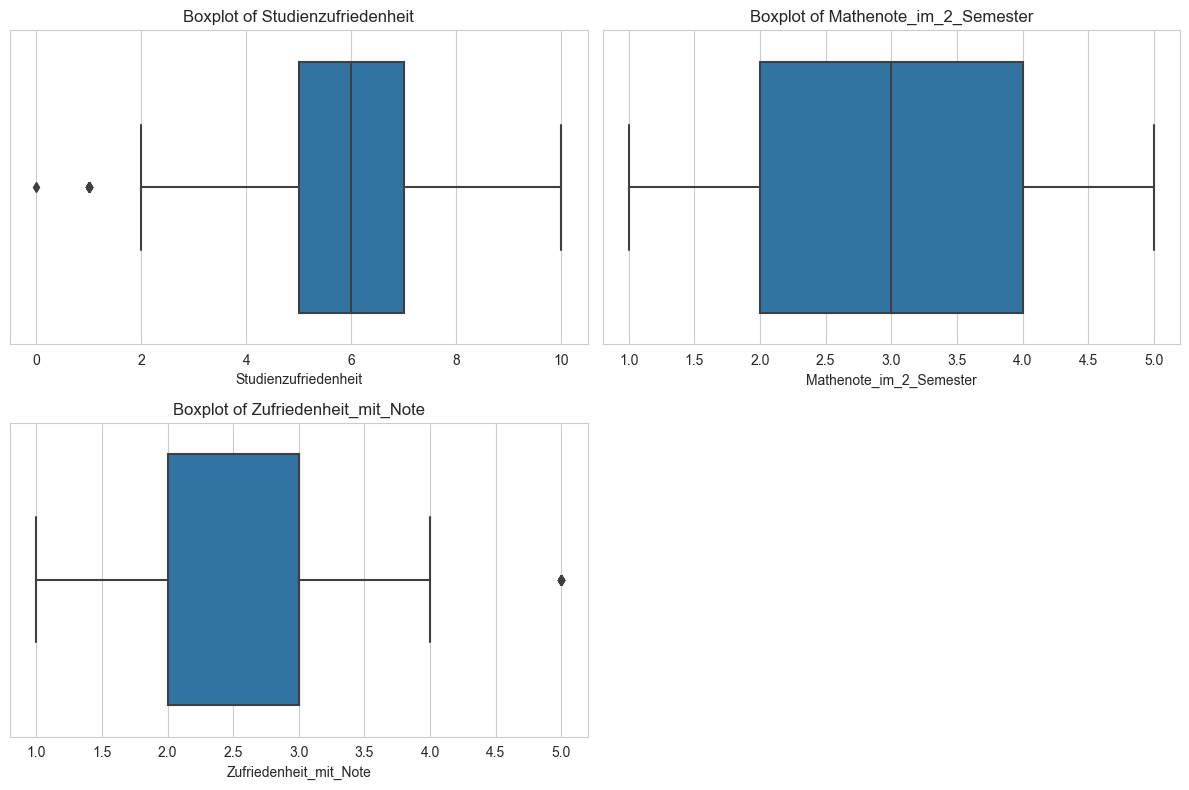

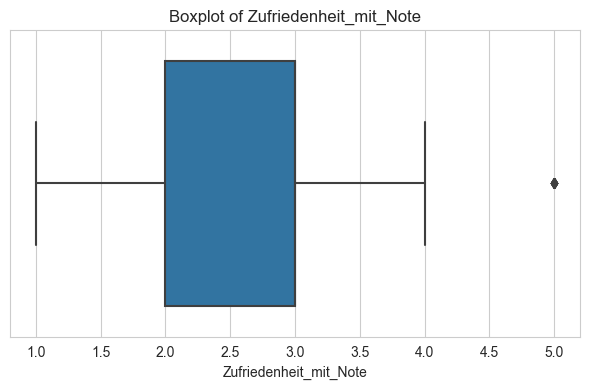

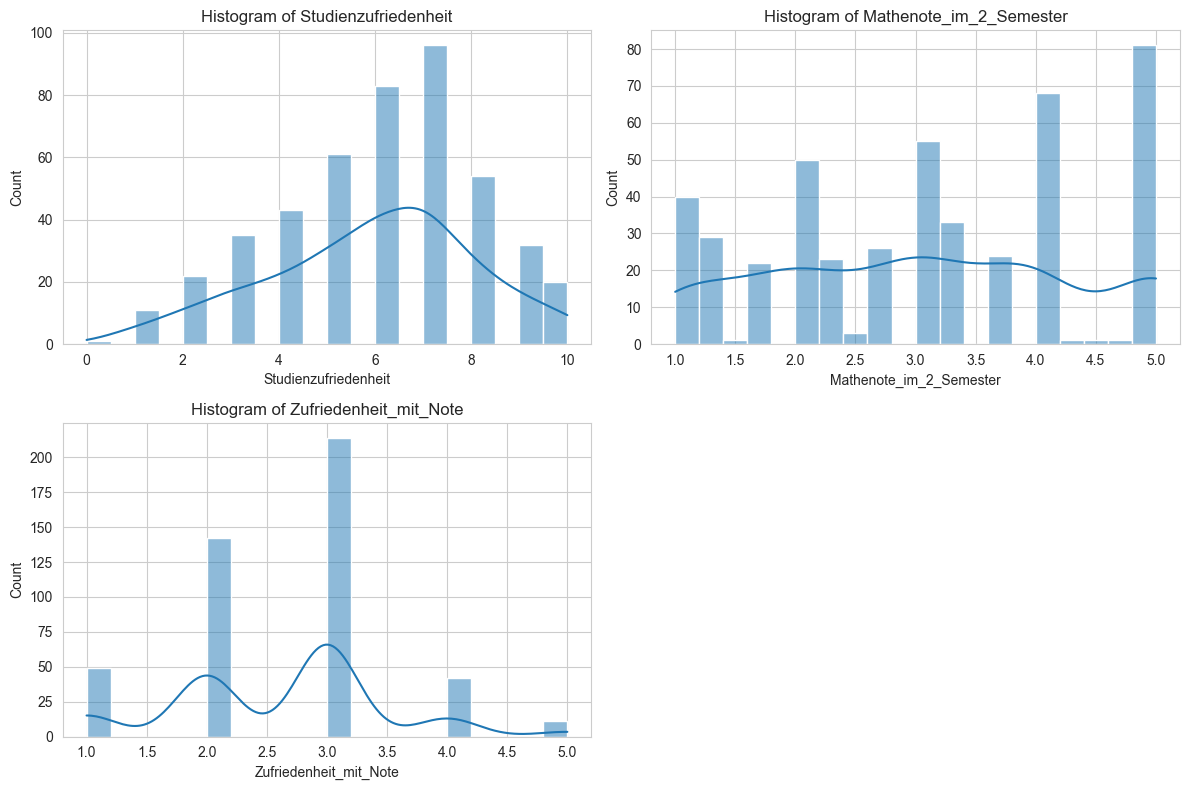

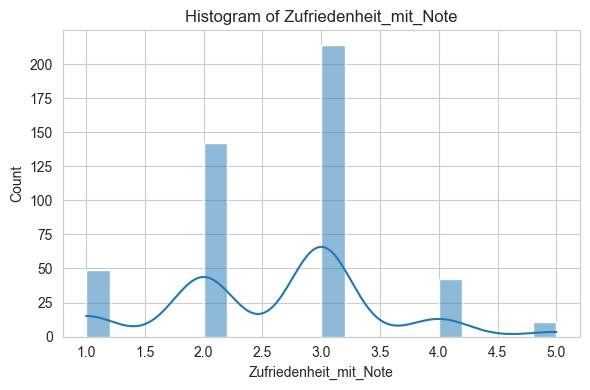

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx")
uni_df

columns_list = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Lebenszufriedenheit', 'Zufriedenheit mit Praxispartner', 'Zufriedenheit mit finanzieller Situation', 'Zufriedenheit mit Gesundheit', 'Zufriedenheit mit Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote im 2. Semester', 'Zufriedenheit mit Note']

columns_without_spaces = [column_name.replace(" ","_").replace("-","_").replace(".","") for column_name in columns_list]
uni_df.columns = columns_without_spaces

dependent_variable = 'Lebenszufriedenheit'
selected_variables = ['Studienzufriedenheit', 'Mathenote_im_2_Semester', 'Zufriedenheit_mit_Note']


uni_df_cleaned = uni_df[selected_variables + [dependent_variable]].dropna()

significant_variables = []

if all(var in uni_df_cleaned.columns for var in selected_variables):
    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned[dependent_variable]

        if pd.api.types.is_numeric_dtype(x):

            x = x.replace([np.inf, -np.inf], np.nan).dropna()

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=variable, data=uni_df_cleaned)
        plt.title(f"Boxplot of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=selected_variables[2], data=uni_df_cleaned)
    plt.title(f"Boxplot of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

    # Histograms for the selected variables
    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
        plt.title(f"Histogram of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(uni_df_cleaned[selected_variables[2]], bins=20, kde=True)
    plt.title(f"Histogram of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")


In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

dependent_variable = 'Lebenszufriedenheit'
selected_variables = ['Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'Lernaufwand', 'Schwierigkeitsgrad', 'Zufriedenheit mit Gesundheit', 'Geschlecht']

# Schritt 1: Daten bereinigen
uni_df_cleaned = uni_df.dropna(subset=[dependent_variable] + selected_variables)

# Schritt 2: Kategoriale Variablen in Dummy-Variablen umwandeln
uni_df_cleaned = pd.get_dummies(uni_df_cleaned, columns=['Geschlecht'], drop_first=True)

# Überprüfen, ob 'Geschlecht' nach der Umwandlung in Dummy-Variablen vorhanden ist
if 'Geschlecht' not in uni_df_cleaned.columns:
    uni_df_cleaned['Geschlecht'] = np.nan

x = uni_df_cleaned[selected_variables]
y = uni_df_cleaned[dependent_variable]

# Schritt 3: Regressionsmodell erstellen
X = sm.add_constant(x)  # Konstante hinzufügen (für den Intercepts)
model = sm.OLS(y, X).fit()

# Schritt 4: Ergebnisse interpretieren
print(model.summary())

# R^2 und adj. R^2
print("R^2:", model.rsquared)
print("Adjusted R^2:", model.rsquared_adj)

# F-Statistik und p-Wert
print("F-Statistik:", model.fvalue)
print("p-Wert (F-Test):", model.f_pvalue)

# Interpretation der Koeffizienten-Tabelle (nur als Beispiel, die Ausgabe hängt von den tatsächlichen Variablen ab)
print("\nKoeffizienten-Tabelle:")
coefficients = model.params[1:]  # Erste Zeile überspringen, da es die Konstante ist
p_values = model.pvalues[1:]    # Erste Zeile überspringen, da es die Konstante ist

for variable, coef, p_value in zip(selected_variables, coefficients, p_values):
    print(f"{variable}: Coefficient = {coef:.4f}, p-Wert = {p_value:.4f}")


MissingDataError: exog contains inf or nans

KeyError: 'Durchschnittsnote im Abitur'

                          Variable  durchgeführter Test  Ergebnis des Tests
0             Studienzufriedenheit  Pearson-Korrelation        3.575145e-26
1                 Beziehungsstatus  Pearson-Korrelation        5.873179e-02
2  Zufriedenheit mit Praxispartner  Pearson-Korrelation        8.185001e-20

Descriptive Statistics:
       Studienzufriedenheit  Beziehungsstatus  Zufriedenheit mit Praxispartner
count            692.000000        692.000000                       692.000000
mean               5.973988          1.956647                         6.671965
std                2.122013          1.018426                         2.611490
min                0.000000          1.000000                         0.000000
25%                5.000000          1.000000                         5.000000
50%                6.000000          2.000000                         7.000000
75%                7.000000          2.000000                         9.000000
max               10.000000          5.

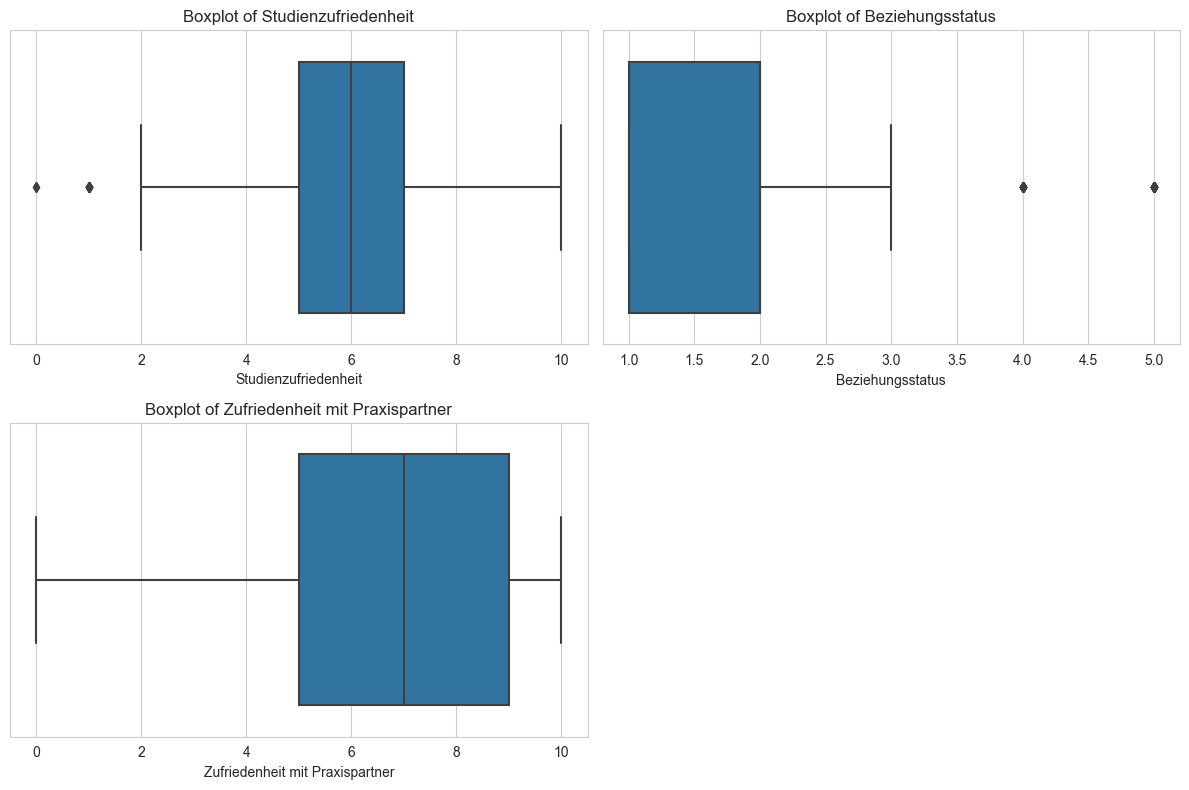

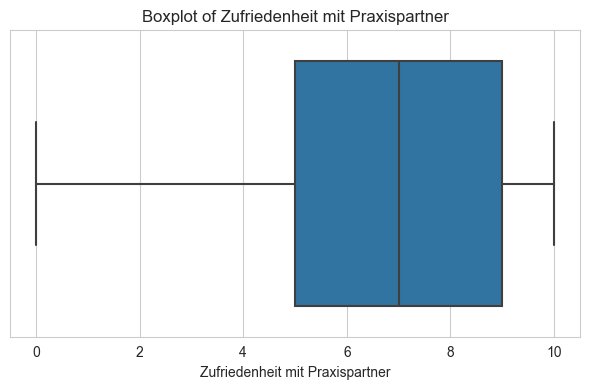

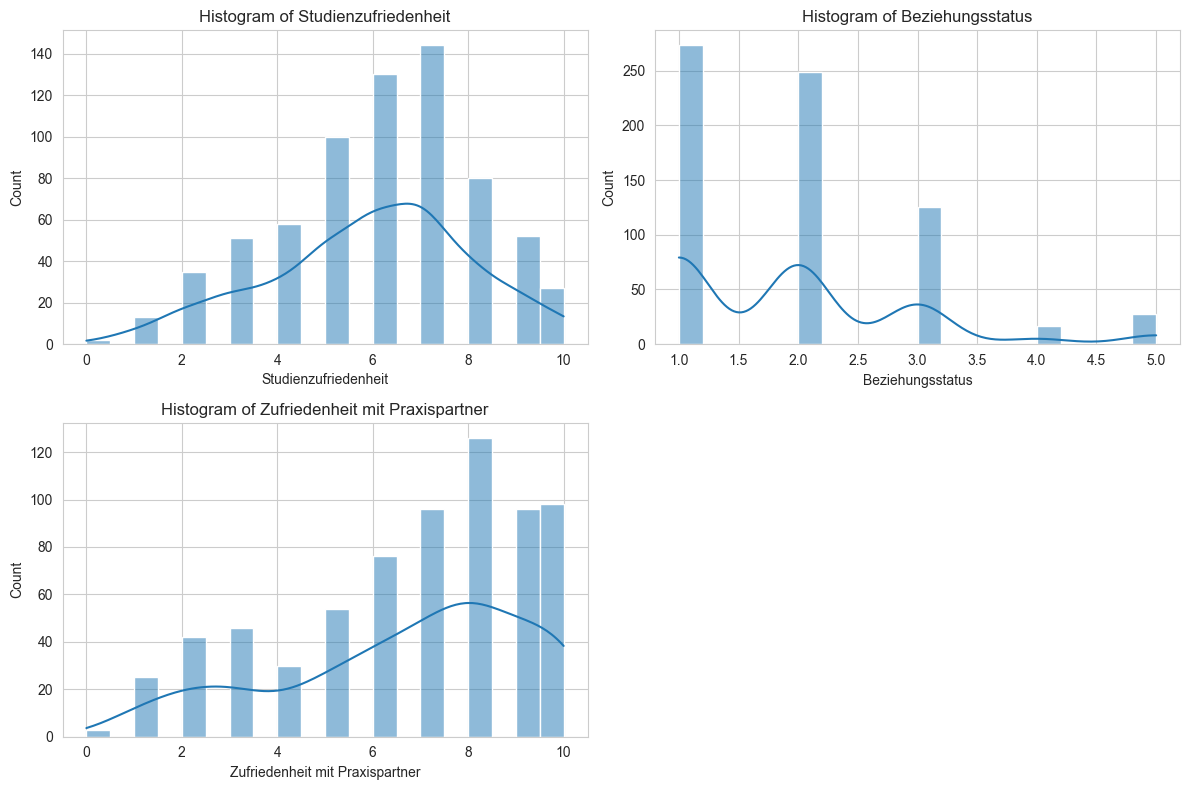

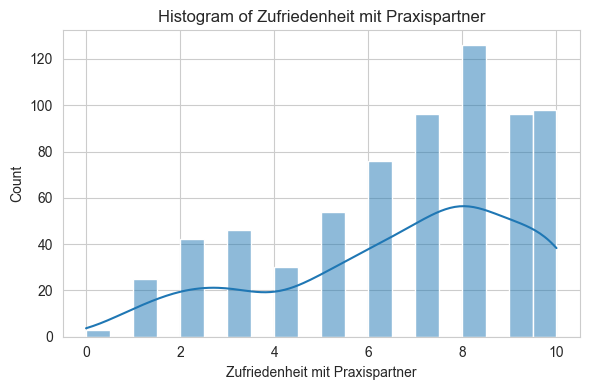

In [37]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx")

dependent_variable = 'Lebenszufriedenheit'
selected_variables = ['Studienzufriedenheit', 'Beziehungsstatus', 'Zufriedenheit mit Praxispartner']

# Drop rows with missing values in selected variables
uni_df_cleaned = uni_df[selected_variables + [dependent_variable]].dropna()

significant_variables = []

if all(var in uni_df_cleaned.columns for var in selected_variables):
    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned[dependent_variable]

        if pd.api.types.is_numeric_dtype(x):
            # Check and remove infinite values from x
            x = x.replace([np.inf, -np.inf], np.nan).dropna()

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=variable, data=uni_df_cleaned)
        plt.title(f"Boxplot of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=selected_variables[2], data=uni_df_cleaned)
    plt.title(f"Boxplot of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

    # Histograms for the selected variables
    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
        plt.title(f"Histogram of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(uni_df_cleaned[selected_variables[2]], bins=20, kde=True)
    plt.title(f"Histogram of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")
